<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Проверка-формулы" data-toc-modified-id="Проверка-формулы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка формулы</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li>

# Восстановление золота из руды

Задача данного проекта - подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

В данном проекте мы будем обращаться к библиотекам *pandas*, *matplotlib* и *sklearn.*

* Задача данного исследования - создать модель, которая поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
* План действий:
    * Получить датасет
    * Проанализировать данные
    * Провести предобработку данных
    * Обучить модели и выбрать лучшие

## Подготовка данных

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Получение данных

Для начала получим наши данные и проанализиуем их

In [188]:
full_data = pd.read_csv('D:\PY\dsProject1\gold_recovery_full_new.csv')
test_data = pd.read_csv('D:\PY\dsProject1\gold_recovery_test_new.csv')
train_data = pd.read_csv('D:\PY\dsProject1\gold_recovery_train_new.csv')

In [189]:
display(full_data)
display(test_data)
display(train_data)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [190]:
display(full_data.describe())
display(test_data.describe())
train_data.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


Теперь приступим к проверке эффективности обагощения.Для этого создадим сначала функцию для подсчета обогащения.

In [191]:
def recovery(C,F,T):
    return (C*(F-T))/(F*(C-T))*100

Проверим ее на обучающей выборке roughter.output.recovery

In [192]:
print(train_data['rougher.output.recovery'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64


In [193]:
C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']

In [194]:
recovery_res = recovery(C,F,T)
display(recovery_res)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [195]:
mae = mean_absolute_error(y_true=train_data['rougher.output.recovery'],y_pred=recovery_res)
mae

9.73512347450521e-15

Присутвтвует небольше значение средней абсолютной ошибки. Скорее всего , дело в том, в каком порядке происходили арифм операции и в каких данных их сохранил питон. Попробуем округлить наше посчитанное значение и уже хранящееся в датасете с одинаковым кол-вом знаков после запятых и посчитать ошибку еще раз

In [196]:
mae = mean_absolute_error(y_true=round(train_data['rougher.output.recovery'],8),y_pred=round(recovery_res,8))
mae

0.0

Теперь проанализируем признаки, недоступные в тестовой выборке.

In [197]:
from numpy import setdiff1d
col1 = train_data.columns
col2 = test_data.columns
print(len(col1))
print(len(col2))
setdiff1d(col2, col1)

87
53


array([], dtype=object)

In [198]:
display(set(train_data.columns) - set(test_data.columns))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Если рассмотреть прзнаки которые есть в train но нет в test, то это будут признаки финального материала, отвальные хвосты и концентраты первчной очистки, вторичной очитки  и материалы флотации, а также признак recovery, который использует ранее перечисленные признаки для своего подсчета. То есть отсутствуют данные о доле финального материала, и материала , полученного в процессе каких-либо этапов.Это логично, так как тестовая выборка должна содержать не итоговый материал(целевые признаки) а начальный.

Осталось провести предобработку данных

In [199]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Можно сразу что признак date имеет тип object, можно сменить на date

In [200]:
train_data['date'] =  pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S.%f')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

In [201]:
train_data.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Присутствует достаточное кол-во пропусков, все признаки кроме date имеют тип float64. Посмотрим в какой период времени присутствуют эти пропуска на одном из признаков.

In [202]:
train_data[train_data['rougher.state.floatbank10_e_air'].isna()]['date']

9843    2018-01-13 06:59:59
9844    2018-01-13 07:59:59
9845    2018-01-13 08:59:59
9846    2018-01-13 09:59:59
9847    2018-01-13 10:59:59
                ...        
10565   2018-02-23 10:59:59
10566   2018-02-23 11:59:59
10567   2018-02-23 12:59:59
10568   2018-02-23 13:59:59
10569   2018-02-23 14:59:59
Name: date, Length: 436, dtype: datetime64[ns]

Данные с пропусками имеют временной ряд с промежутком в час. Можно предположить, что в один момент времени произошла техническая ошибка, которая не позволила записать данные. В любом случае можно заметить , что пропуски имеются не в случайных местахпо одиночку а в определенный промежуток времени с шагом записи в час. Этот довод позволит нам заполнить значения 0.

In [203]:
full_data=full_data.fillna(method='ffill')
train_data=train_data.fillna(method='ffill')

## Анализ данных

Посмотрим изменение концентрации металлов на различных шагах обработки(rougher,primary cleaner, secondary cleaner, finally). Изобразим изменения на графике.

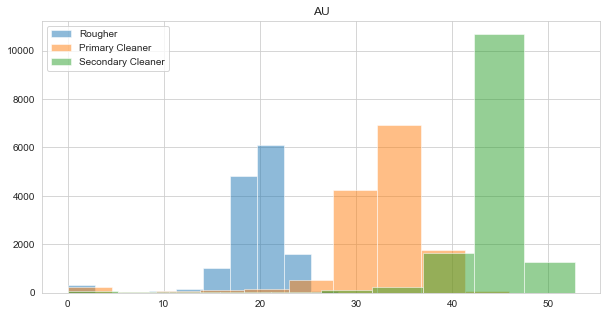

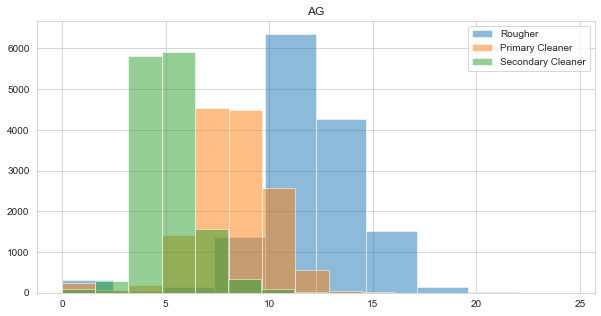

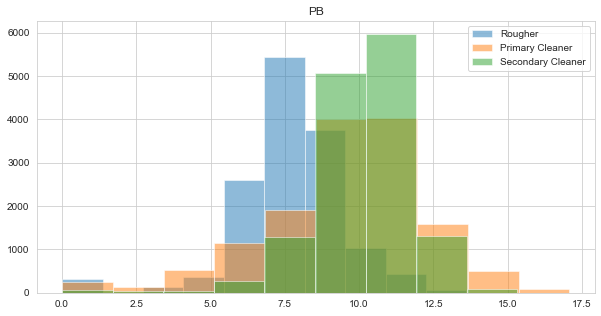

In [204]:
from matplotlib.pyplot import figure
#AU
figure(figsize=(10,5))
plt.title('AU')
plt.hist(train_data['rougher.output.concentrate_au'],alpha = 0.5,bins = 10)
plt.hist(train_data['primary_cleaner.output.concentrate_au'],alpha = 0.5,bins = 10)
plt.hist(train_data['final.output.concentrate_au'],alpha = 0.5,bins = 10,)
plt.legend(['Rougher','Primary Cleaner','Secondary Cleaner'],fontsize='medium')
plt.show()
#AG
figure(figsize=(10,5))
plt.title('AG')
plt.hist(train_data['rougher.output.concentrate_ag'],alpha = 0.5,bins = 10)
plt.hist(train_data['primary_cleaner.output.concentrate_ag'],alpha = 0.5,bins = 10)
plt.hist(train_data['final.output.concentrate_ag'],alpha = 0.5,bins = 10,)
plt.legend(['Rougher','Primary Cleaner','Secondary Cleaner'],fontsize='medium')
plt.show()

#PB
figure(figsize=(10,5))
plt.title('PB')
plt.hist(train_data['rougher.output.concentrate_pb'],alpha = 0.5,bins = 10)
plt.hist(train_data['primary_cleaner.output.concentrate_pb'],alpha = 0.5,bins = 10)
plt.hist(train_data['final.output.concentrate_pb'],alpha = 0.5,bins = 10,)
plt.legend(['Rougher','Primary Cleaner','Secondary Cleaner'],fontsize='medium')
plt.show()

Если проследить как менялись значения AU, можно сказать, что с каждым этапом пики увеличивались. Что не скажешь например про изменение AG - тут наибольший пик приходится на AG после первого этапа. А в ситуации с PB пиковые значения на втором этапе значительно уменьшились а потом , на последнем этапе пик опять вырос.

Теперь сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Для этого опять построим график распределения.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages

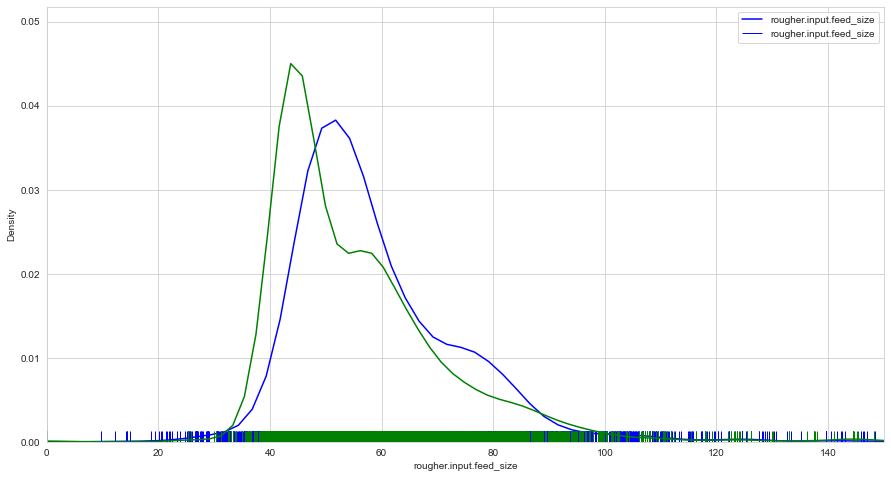

In [205]:
figure(figsize=(10,5))
sns.distplot(train_data['rougher.input.feed_size'], hist=False,rug=True, kde=True,color='blue')
sns.distplot(test_data['rougher.input.feed_size'], hist=False, rug=True,kde=True,color='green')
plt.xlim(0, 150);
plt.gcf().set_size_inches(15, 8)
plt.legend(['rougher.input.feed_size','rougher.input.feed_size'])
plt.show()

Можно увидеть, что распределения достаточно близки к друг другу, поэтому их оценки моделей можно будет сравнивать.

Теперь исследуем суммарные концентрации также для разных процессов для разного сырья. Для исследования изобразим данные на графиках.

In [206]:
train_data['rougher_sum']= train_data['rougher.output.concentrate_au'] + train_data['rougher.output.concentrate_ag'] + train_data['rougher.output.concentrate_pb']
train_data['primary_sum'] = train_data['primary_cleaner.output.concentrate_au'] + train_data['primary_cleaner.output.concentrate_ag'] + train_data['primary_cleaner.output.concentrate_pb']
train_data['secondary_sum']= train_data['final.output.concentrate_au'] + train_data['final.output.concentrate_ag'] + train_data['final.output.concentrate_pb']

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distribut

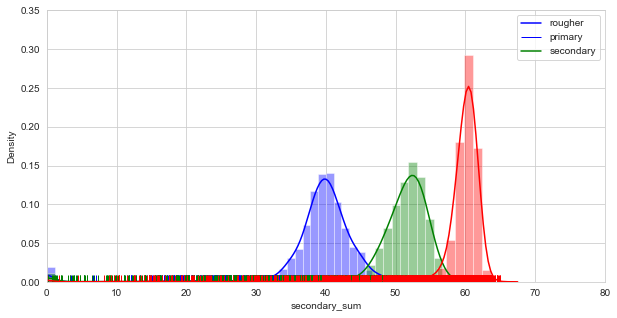

In [207]:
figure(figsize=(10,5))
sns.distplot(train_data['rougher_sum'], hist=True,rug=True, kde=True,color='blue')
sns.distplot(train_data['primary_sum'], hist=True, rug=True,kde=True,color='green')
sns.distplot(train_data['secondary_sum'], hist=True, rug=True,kde=True,color='red')
plt.xlim(0, 80);
plt.legend(['rougher','primary','secondary'])
plt.show()

Конечно, концентрации больше всего на последнем этапе, с каждым этапом концентрация возрастает. Также, по распределению можно заметить выбросы, значения, меньшие 30.Можно их убрать из нашего датасета.

In [208]:
train_data=train_data[train_data['rougher_sum']>30]
train_data=train_data[train_data['primary_sum']>30]
train_data=train_data[train_data['secondary_sum']>30]

train_data.head()
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


## Модель

Напишем функцию для вычисления sMAPE

In [209]:
# def smape(y,y_pred):
#     smape = (sum(abs(y-y_pred)/((abs(y)+abs(y_pred))/2)))/len(y)
#     return smape

def smape (predict, target):
    smape = abs(target-predict)/((abs(target)+abs(predict))/2)*100
    smape=smape.fillna(value=0)
    smape = sum(smape)/len(smape)
    return smape

Далее напишем scorer для нашей модели для нахождения наиболее оптимальных параметров.

In [210]:
def scorer(model,features,target):
    predicted = model.predict(features)
    sMAPE = smape(target,predicted)
    return sMAPE

Так как нужно спрогнозировать сразу две величины: rougher.output.recovery и final.output.recovery, сделаем это по порядку.

### rougher.output.recovery

In [211]:
rougher_columns = [c for c in test_data.columns if "rougher" in c]

data  = train_data[rougher_columns]
x_rougher = train_data[rougher_columns]
y_rougher = train_data['rougher.output.recovery']
integer_features = data.select_dtypes(exclude="object").columns

#### DecisionTreeRegressor

In [212]:
column_transformer = ColumnTransformer([('numeric',StandardScaler(),rougher_columns)])
pipe = Pipeline([('ct',column_transformer),('model',DecisionTreeRegressor(random_state=12345))])
pipe.fit(x_rougher,y_rougher)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['rougher.input.feed_ag',
                                                   'rougher.input.feed_pb',
                                                   'rougher.input.feed_rate',
                                                   'rougher.input.feed_size',
                                                   'rougher.input.feed_sol',
                                                   'rougher.input.feed_au',
                                                   'rougher.input.floatbank10_sulfate',
                                                   'rougher.input.floatbank10_xanthate',
                                                   'rougher.input.floatbank11_sulfate',
                                                   'rougher....
                                                   'rougher.state.floatbank10_b_level',
                    

In [213]:
params = {'model__max_depth': range(1,11,2)}
grid = GridSearchCV(pipe, params, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid.fit(x_rougher, y_rougher)
print('Лучшие параметры:', grid.best_params_, '\n')
print('Лучший счет:', grid.best_score_, '\n')

Лучшие параметры: {'model__max_depth': 3} 

Лучший счет: -6.815880901313159 



#### LinearRegression

Попробуем сделать то же самое с линейной регрессией

In [214]:
features_train_r, features_valid_r, target_train_r, target_valid_r = train_test_split(
    x_rougher, y_rougher, test_size=0.25, random_state=12345)

column_transformer = ColumnTransformer([('numeric',StandardScaler(),rougher_columns)])
pipe = Pipeline([('ct',column_transformer),('model',LinearRegression())])
pipe.fit(features_train_r,target_train_r)
predictions_valid_r = pipe.predict(features_valid_r)

scores = cross_val_score(pipe, x_rougher, y_rougher, cv=5, scoring=make_scorer(smape))

final_score = sum(scores)/len(scores)

print(final_score)

6.497864713724953


#### RandomForesRegressor

In [215]:

column_transformer = ColumnTransformer([('numeric',StandardScaler(),rougher_columns)])
pipe = Pipeline([('ct',column_transformer),('model',RandomForestRegressor(random_state=12345))])
pipe.fit(x_rougher,y_rougher)
params = {'model__max_depth': range(1,11,2),'model__n_estimators': range (10, 41, 10)}
grid = GridSearchCV(pipe, params, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid.fit(x_rougher, y_rougher)
print('Лучшие параметры:', grid.best_params_, '\n')
print('Лучший счет:', grid.best_score_, '\n')

Лучшие параметры: {'model__max_depth': 5, 'model__n_estimators': 40} 

Лучший счет: -6.426063967047843 



### final.output.recovery

#### DecisionTreeRegressor

In [216]:
final_columns = [c for c in test_data.columns]
x_final = train_data[final_columns].drop('date', axis=1)
integer_features = test_data.select_dtypes(exclude="object").columns
y_final = train_data['final.output.recovery']

In [217]:
column_transformer = ColumnTransformer([('numeric',StandardScaler(),rougher_columns)])
pipe = Pipeline([('ct',column_transformer),('model',DecisionTreeRegressor(random_state=12345))])
pipe.fit(x_final,y_final)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['rougher.input.feed_ag',
                                                   'rougher.input.feed_pb',
                                                   'rougher.input.feed_rate',
                                                   'rougher.input.feed_size',
                                                   'rougher.input.feed_sol',
                                                   'rougher.input.feed_au',
                                                   'rougher.input.floatbank10_sulfate',
                                                   'rougher.input.floatbank10_xanthate',
                                                   'rougher.input.floatbank11_sulfate',
                                                   'rougher....
                                                   'rougher.state.floatbank10_b_level',
                    

In [218]:
params = {'model__max_depth': range(1,11,2)}
grid = GridSearchCV(pipe, params, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid.fit(x_final, y_final)
print('Лучшие параметры:', grid.best_params_, '\n')
print('Лучший счет:', grid.best_score_, '\n')

Лучшие параметры: {'model__max_depth': 1} 

Лучший счет: -9.213755793750702 



#### LinearRegression

In [219]:

features_train_f, features_valid_f, target_train_f, target_valid_f = train_test_split(
    x_final, y_final, test_size=0.25, random_state=12345)

column_transformer = ColumnTransformer([('numeric',StandardScaler(),integer_features)])
pipe = Pipeline([('ct',column_transformer),('model',LinearRegression())])
pipe.fit(features_train_f,target_train_f)
predictions_valid_f = pipe.predict(features_valid_f)

scores = cross_val_score(pipe, x_final, y_final, cv=5, scoring=make_scorer(smape))

final_score = sum(scores)/len(scores)

print(final_score)

10.966353182480777


#### RandomForestRegressor

In [221]:

column_transformer = ColumnTransformer([('numeric',StandardScaler(),integer_features)])
pipe = Pipeline([('ct',column_transformer),('model',RandomForestRegressor(random_state=12345))])
pipe.fit(x_final,y_final)
params = {'model__max_depth': range(1,11,2),'model__n_estimators': range (10, 41, 10)}
grid = GridSearchCV(pipe, params, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid.fit(x_final, y_final)
print('Лучшие параметры:', grid.best_params_, '\n')
print('Лучший счет:', grid.best_score_, '\n')

Лучшие параметры: {'model__max_depth': 5, 'model__n_estimators': 20} 

Лучший счет: -8.668097441914677 



Лучше всего себя повел случайный лес, поэтому именно эту модель мы будем использовать на тестировании.

In [222]:
data_test = pd.merge(test_data, full_data[['date', 'rougher.output.recovery']], on='date')
data_test = data_test.fillna(method='ffill')

In [223]:
rougher_columns = [c for c in data_test.columns if "rougher" in c]
x_rougher_features = data_test[rougher_columns].drop('rougher.output.recovery', axis=1)

In [224]:
best_model_rougher = RandomForestRegressor(random_state=12345, max_depth=5, n_estimators=40)
best_model_rougher.fit(x_rougher, y_rougher)
predicted_rough = best_model_rougher.predict(x_rougher_features)
smape_rougher = smape(predicted_rough, data_test['rougher.output.recovery'])

In [225]:
data_test = pd.merge(test_data, full_data[['date', 'final.output.recovery']], on='date')
data_test = data_test.fillna(method='ffill')
x_final_features = data_test.drop(['final.output.recovery', 'date'], axis=1)

In [226]:
best_model_final = RandomForestRegressor(random_state=12345, max_depth=5, n_estimators=20)
best_model_final.fit(x_final, y_final)
predicted_final = best_model_final.predict(x_final_features)
smape_final = smape(predicted_final, data_test['final.output.recovery'])

In [227]:
0.25 * smape_rougher + 0.75 * smape_final

9.45057104138932

## Вывод

В данной работе было проведено несколько этапов для прогнозирования двух признаков. Данные были подготовлены, были заполнены пропуски и также проанализированны признаки. Было проведено сравнение нецелевых признаков , построены признаки для анализа сырья на разных этапах.Оказалось, что концентрация золота постепенно растет с каждым этапом обработки, что не скажешь про серебро и свинец. А если рассматривать все три сырья вместе для каждого этапа, то в целом тут тоже наблюдается постепенный рост с новым этапом обработки. Были найдены выбросы , от которых мы избавились для лучшего последующего обучения модели. Мы также исследовали распределение размеров гранул сырья на обучающей и тестовой выборках, и выяснили что распределения достаточно близци к друг другу, что означает , что оценки моделей на этих выборках можно будет сравнивать. И наконец была проведена работа по обучению и тестированию модели. Для выбора модели рассматривались случайный лес, линейная регрессия и дерево решений. В качестве метрики качества использовалось sMape(симметричное среднее абсолютное процентное отклонение), для которой создали отдельную функцию. Для обучения и подбора гиперпараметров для моделей использовались PipeLine, GridSearchCv и cross_val_score. После чего, была выявлена лучшая модель ,которая показала лучший результат среди других - Случайный лес. На этой модели было произведено тестирование а также выявлена итоговая sMAPE, что составила 9.4, отклонение оказалось достаточно небольшим, близким к нулю, что означает, что была проделена качественная работа для прогнозирования.